In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import scipy.stats as stats
import pickle
from itertools import product

n_itr = 10000

In [2]:
path = 'polblogs.gml'
g = nx.read_gml(path)
g2 = nx.gnm_random_graph(g.number_of_nodes(), g.number_of_edges())

In [3]:
most_linked_nodes_g = [each[0] for each in sorted(dict(g.in_degree).items(), key = lambda x:x[1])[-150:]]
most_linked_nodes_g_node_idx = [list(g.nodes).index(i) for i in most_linked_nodes_g]

In [4]:
num_edges = g.number_of_edges()
num_nodes = g.number_of_nodes()
print('This graph has {:,} edges and {:,} nodes'.format(num_edges, num_nodes))

This graph has 19,090 edges and 1,490 nodes


In [5]:
left_pages = []
right_pages = []
misc_pages = []
for k, v in dict(g.nodes).items():
    if v['value'] == 0:
        left_pages.append(k)
    elif v['value'] == 1:
        right_pages.append(k)
    else:
        misc_pages.append(k)
        
left_node_idx = [list(g.nodes).index(i) for i in left_pages]
right_node_idx = [list(g.nodes).index(i) for i in right_pages]

Using the Nodes with the Highest Degree

In [6]:
def is_connected(g, n1, n2):
    if (n2, n1) in g.edges or (n1, n2) in g.edges:
        return True
    else:
        return False
    
def kl(p, q):
    results = [p[i] * np.log2(p[i]/q[i]) for i in range(len(p))]
    return np.sum(results)

def sampling(g = None, data = None, num_draw = None, itr = None, cnt_type = None):
    results = []
    for i in range(itr):
        n1, n2 = np.random.choice(data, num_draw, replace=False)
        results.append(is_connected(g=g, n1=n1, n2=n2))
    if cnt_type == True:
        return results.count(True)
    elif cnt_type == False:
        return results.count(False)

In [7]:
start = time.time()

# Is there structure in the initial graphs?
results_initial = []
for i in range(n_itr):
    draw_results = sampling(g=g, data=most_linked_nodes_g, num_draw=2, itr=1000, cnt_type=True)
    results_initial.append(draw_results)
    
results_random = []
for i in range(n_itr):
    draw_results = sampling(g=g2, data=most_linked_nodes_g_node_idx, num_draw=2, itr=1000, cnt_type=True)
    results_random.append(draw_results)
    
# Are the left leaning sites more connected than the right leaning ones?
results_left = []
for i in range(n_itr):
    draw_results = sampling(g=g, data=left_pages, num_draw=2, itr=1000, cnt_type=True)
    results_left.append(draw_results)
    
left_results_random = []
for i in range(n_itr):
    draw_results = sampling(g=g2, data=left_node_idx, num_draw=2, itr=1000, cnt_type=True)
    left_results_random.append(draw_results)
    
results_right = []
for i in range(n_itr):
    draw_results = sampling(g=g, data=right_pages, num_draw=2, itr=1000, cnt_type=True)
    results_right.append(draw_results)
    
right_results_random = []
for i in range(n_itr):
    draw_results = sampling(g=g2, data=right_node_idx, num_draw=2, itr=1000, cnt_type=True)
    right_results_random.append(draw_results)
    
end = time.time()

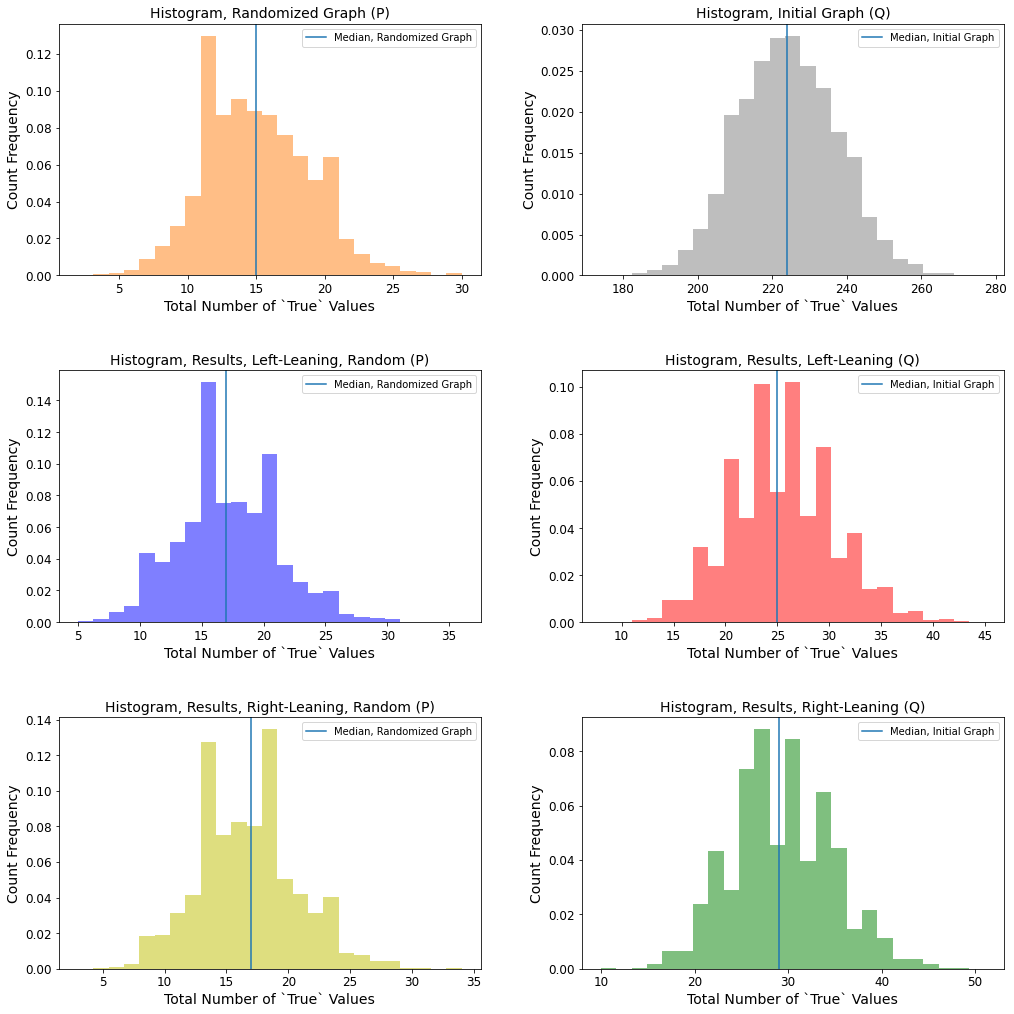

In [8]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 2)
plt.title('Histogram, Initial Graph (Q)', fontsize=14)
plt.xlabel('Total Number of `True` Values', fontsize=14)
plt.ylabel('Count Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.hist(results_initial, color='tab:gray', alpha=0.5, density=True, bins=25, )
plt.axvline(np.median(results_initial), label='Median, Initial Graph')
plt.legend()

plt.subplot(3, 2, 1)
plt.title('Histogram, Randomized Graph (P)', fontsize=14)
plt.xlabel('Total Number of `True` Values', fontsize=14)
plt.ylabel('Count Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=4.0)
plt.axvline(np.median(results_random), label='Median, Randomized Graph')
plt.hist(results_random, color='tab:orange', alpha=0.5, bins=25, density=True)
plt.legend()

plt.subplot(3, 2, 4)
plt.title('Histogram, Results, Left-Leaning (Q)', fontsize=14)
plt.xlabel('Total Number of `True` Values', fontsize=14)
plt.ylabel('Count Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.hist(results_left, color='r', alpha=0.5, density=True, bins=25)
plt.axvline(np.median(results_left), label='Median, Initial Graph')
plt.legend()

plt.subplot(3, 2, 3)
plt.title('Histogram, Results, Left-Leaning, Random (P)', fontsize=14)
plt.xlabel('Total Number of `True` Values', fontsize=14)
plt.ylabel('Count Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=4.0)
plt.axvline(np.median(left_results_random), label='Median, Randomized Graph')
plt.hist(left_results_random, color='b', alpha=0.5, density=True, bins=25)
plt.legend()

plt.subplot(3, 2, 6)
plt.title('Histogram, Results, Right-Leaning (Q)', fontsize=14)
plt.xlabel('Total Number of `True` Values', fontsize=14)
plt.ylabel('Count Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.hist(results_right, color='g', alpha=0.5, density=True, bins=25)
plt.axvline(np.median(results_right), label='Median, Initial Graph')
plt.legend()

plt.subplot(3, 2, 5)
plt.title('Histogram, Results, Right-Leaning, Random (P)', fontsize=14)
plt.xlabel('Total Number of `True` Values', fontsize=14)
plt.ylabel('Count Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(pad=4.0)
plt.axvline(np.median(right_results_random), label='Median, Randomized Graph')
plt.hist(right_results_random, color='y', alpha=0.5, density=True, bins=25)
plt.legend()

plt.show()

In [9]:
#Most Connected Nodes
kl_divergence_most = kl(q=results_initial, p=results_random)
print('Most Popular Nodes: KL(P || Q) = {0:,.3f} bits'.format(kl_divergence_most))

#Left-Leaning Nodes
kl_divergence_left = kl(q=results_left, p=left_results_random)
print('Left-Leaning Nodes: KL(P || Q) = {0:,.3f} bits'.format(kl_divergence_left))

#Right-Leaning Nodes
kl_divergence_right = kl(q=results_right, p=right_results_random)
print('Right-Leaning Nodes: KL(P || Q) = {0:,.3f} bits'.format(kl_divergence_right))

Most Popular Nodes: KL(P || Q) = -579,828.712 bits
Left-Leaning Nodes: KL(P || Q) = -85,943.712 bits
Right-Leaning Nodes: KL(P || Q) = -124,586.858 bits


In [10]:
etime = (end - start) / (60*60)
print('Elapsed Time: {0:.3f} hrs'.format(etime))

Elapsed Time: 1.896 hrs


In [11]:
#Most Connected Nodes
stats.ttest_ind(np.array(results_initial), np.array(results_random))

Ttest_indResult(statistic=1526.2256484009285, pvalue=0.0)

In [12]:
#Left-Leaning Nodes
stats.ttest_ind(np.array(results_left), np.array(left_results_random))

Ttest_indResult(statistic=128.8191961081024, pvalue=0.0)

In [13]:
#Right-Leaning Nodes
stats.ttest_ind(np.array(results_right), np.array(right_results_random))

Ttest_indResult(statistic=189.08977611081488, pvalue=0.0)

Are there paths from left leaning to right leaning sites?

In [14]:
cart_product_left_right = [(l, r) for l, r in product(left_pages, right_pages)]
has_path = []
no_path = []
for each in cart_product_left_right:
    if nx.has_path(g, each[0], each[1]):
        has_path.append(each)
    else:
        no_path.append(each)
print('Percentage of left leaning sites that form a path to right leaning sites: {:.1f}%'.format(100*(len(has_path)/len(cart_product_left_right))))

Percentage of left leaning sites that form a path to right leaning sites: 46.6%


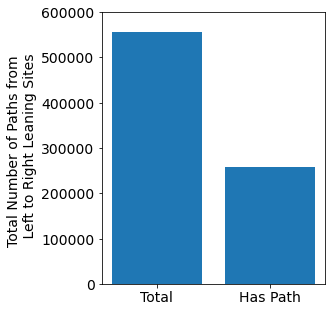

In [15]:
plt.figure(figsize=(4, 5))
x = ['Total', 'Has Path']
y = [len(cart_product_left_right), len(has_path)]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y)
plt.xticks(x_pos, x, fontsize=14)
plt.ylim(0, 600000)
plt.yticks(fontsize=14)
plt.ylabel('Total Number of Paths from \n Left to Right Leaning Sites', fontsize=14)
plt.show()

In [16]:
cart_product_right_left = [(r, l) for r, l in product(right_pages, left_pages)]
has_path = []
no_path = []
for each in cart_product_right_left:
    if nx.has_path(g, each[0], each[1]):
        has_path.append(each)
    else:
        no_path.append(each)
print('Percentage of right leaning sites that form a path to left leaning sites: {:.1f}%'.format(100*(len(has_path)/len(cart_product_left_right))))

Percentage of right leaning sites that form a path to left leaning sites: 41.4%


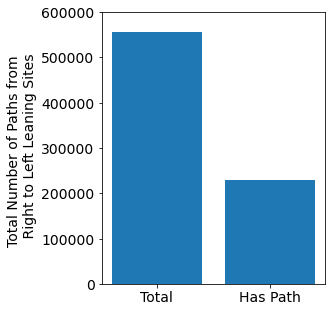

In [17]:
plt.figure(figsize=(4, 5))
x = ['Total', 'Has Path']
y = [len(cart_product_left_right), len(has_path)]
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y)
plt.xticks(x_pos, x, fontsize=14)
plt.ylim(0, 600000)
plt.yticks(fontsize=14)
plt.ylabel('Total Number of Paths from \n Right to Left Leaning Sites', fontsize=14)
plt.show()

Is there way to quantify the preference for the network to attach to other nodes that are similar?

In [18]:
nx.attribute_assortativity_coefficient(G=g, attribute="value")

0.8229939222013072